In [1]:
%matplotlib inline
import sys
sys.path.insert(0, '/home/cnaik/s/3/ilp')

import numpy as np
import pandas as pd
import operator
from  utils import entailment
import json
from collections import defaultdict
import matplotlib.pyplot as plt
import cPickle as pickle

import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import cm
from matplotlib import rc

/usr/local/lib/python2.7/dist-packages/matplotlib/__init__.py:872: UserWarning: axes.color_cycle is deprecated and replaced with axes.prop_cycle; please use the latter.
  warnings.warn(self.msg_depr % (key, alt_key))


In [2]:
rc("grid", alpha=0.9)
rc("grid", linewidth=0.2)
rc("grid", linestyle=":")

In [3]:
mpl.use('pgf')

def figsize(scale):
    fig_width_pt = 469.755                          # Get this from LaTeX using \the\textwidth
    inches_per_pt = 1.0/72.27                       # Convert pt to inch
    golden_mean = (np.sqrt(5.0)-1.0)/2.0            # Aesthetic ratio (you could change this)
    fig_width = fig_width_pt*inches_per_pt*scale    # width in inches
    fig_height = fig_width*golden_mean              # height in inches
    fig_size = [fig_width,fig_height]
    return fig_size

pgf_with_latex = {                      # setup matplotlib to use latex for output
    "pgf.texsystem": "pdflatex",        # change this if using xetex or lautex
    "text.usetex": True,                # use LaTeX to write all text
    "font.family": "serif",
    "font.serif": [],                   # blank entries should cause plots to inherit fonts from the document
    "font.sans-serif": [],
    "font.monospace": [],
    "axes.labelsize": 10,               # LaTeX default is 10pt font.
    "text.fontsize": 10,
    "legend.fontsize": 8,               # Make the legend/label fonts a little smaller
    "xtick.labelsize": 8,
    "ytick.labelsize": 8,
    "figure.figsize": figsize(1),     # default fig size of 1 textwidth
    "pgf.preamble": [
        r"\usepackage[utf8x]{inputenc}",    # use utf8 fonts becasue your computer can handle it :)
        r"\usepackage[T1]{fontenc}",        # plots will be generated using this preamble
        ]
    }
mpl.rcParams.update(pgf_with_latex)

sns.set_context("paper", font_scale=1.0, rc={'lines.linewidth': 0.75,
                                             'axes.linewidth': 0.75,
                                             'text.usetex': True
                                             })
sns.set_style("whitegrid", {'font.family': 'serif',
                            'font.serif': ['Palatino']})

# sns.set(style="white")

/usr/local/lib/python2.7/dist-packages/matplotlib/__init__.py:1350: UserWarning:  This call to matplotlib.use() has no effect
because the backend has already been chosen;
matplotlib.use() must be called *before* pylab, matplotlib.pyplot,
or matplotlib.backends is imported for the first time.

  warnings.warn(_use_error_msg)
/usr/local/lib/python2.7/dist-packages/matplotlib/__init__.py:872: UserWarning: text.fontsize is deprecated and replaced with font.size; please use the latter.
  warnings.warn(self.msg_depr % (key, alt_key))


In [4]:
e_data = pickle.load(open('../entailment_data/entailment_cache.p', 'rb'))

In [65]:
x = e_data.values()

In [66]:
xdf = pd.DataFrame(x)

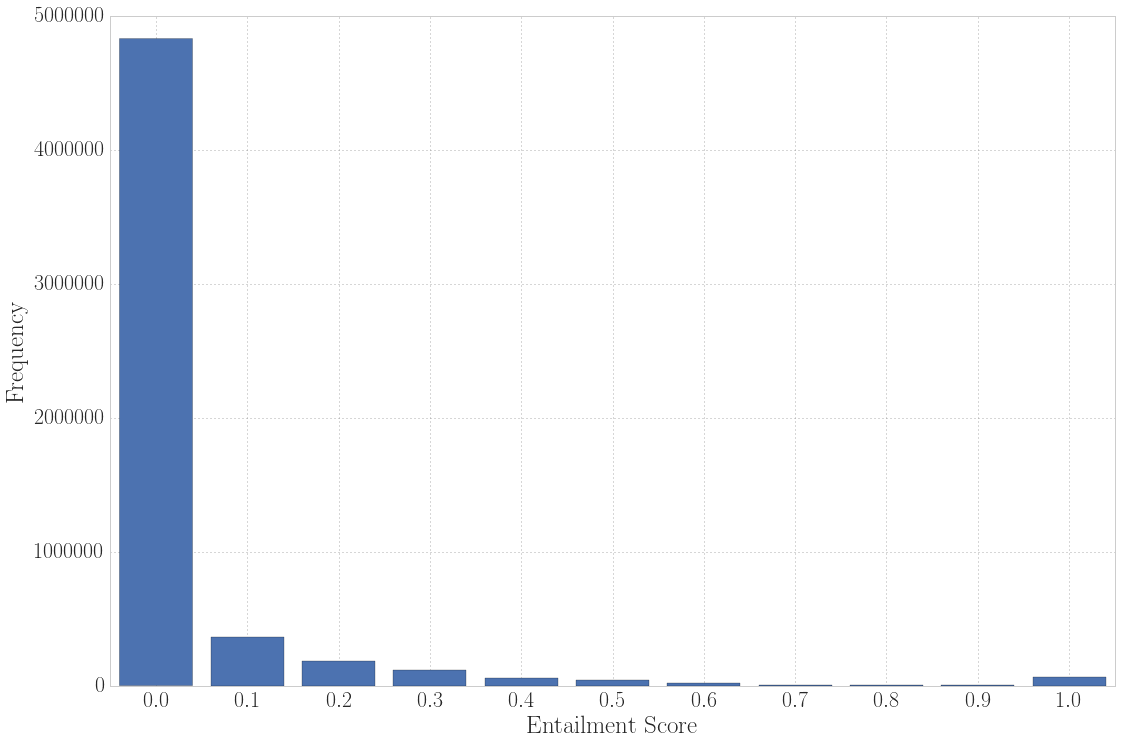

In [67]:
pgf_with_latex = {
        "axes.labelsize": 25,               # LaTeX default is 10pt font.
        "text.fontsize": 22,
        "legend.fontsize": 22,               # Make the legend/label fonts a little smaller
        "xtick.labelsize": 22,
        "ytick.labelsize": 22,
        }
mpl.rcParams.update(pgf_with_latex)
plt.rc('figure', figsize=(18,12))

rc("grid", alpha=0.9)
rc("grid", linewidth=0.7)
rc("grid", linestyle=":")
rc("grid", color='gray')

xticks = np.arange(0, 1.05, 0.1)
plt.xticks(xticks)
plt.grid(True)
plt.xlim([-0.05, 1.05])
# plt.xlim([0.05, 1.05])
# plt.ylim([0, 0.2])

# plt.hist(x, 50)
# plt.hist(x, 50, normed=1, histtype='bar', rwidth=0.7)
plt.hist(x, 20, histtype='bar', rwidth=0.8, align='left')
plt.xlabel('Entailment Score')
plt.ylabel('Frequency')

# plt.tight_layout()
plt.savefig("entailment_distribution" + ".pdf", format='pdf')
plt.show()

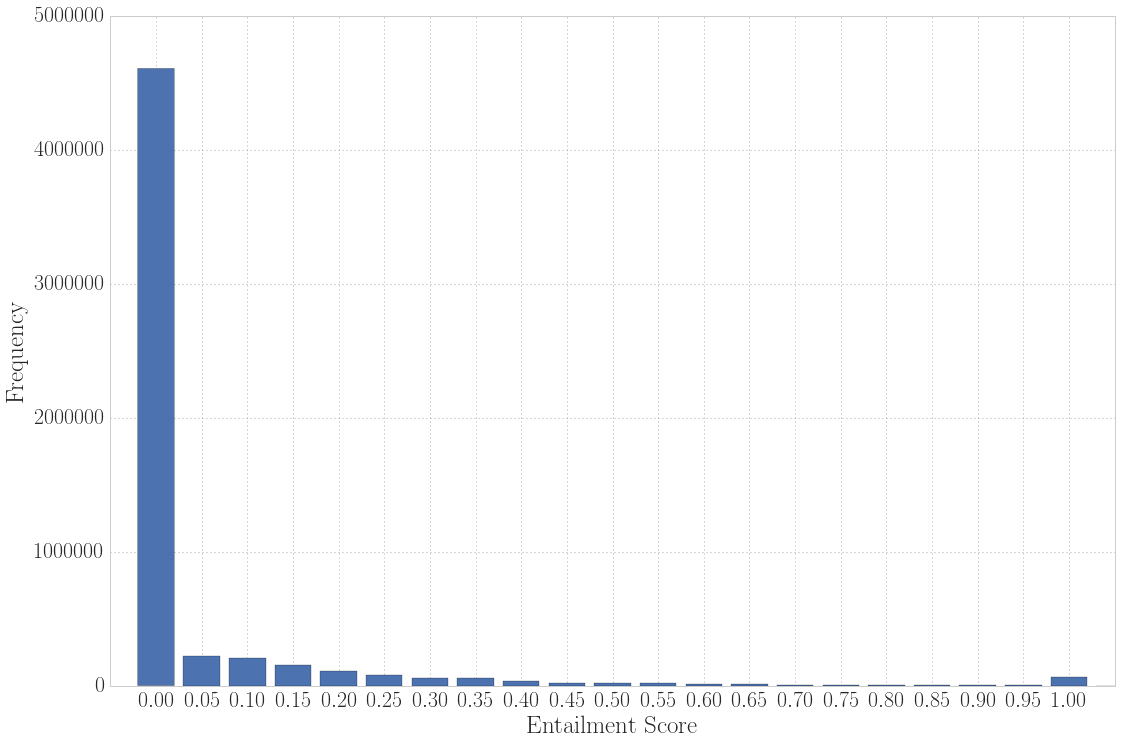

In [68]:
pgf_with_latex = {
        "axes.labelsize": 25,               # LaTeX default is 10pt font.
        "text.fontsize": 22,
        "legend.fontsize": 22,               # Make the legend/label fonts a little smaller
        "xtick.labelsize": 22,
        "ytick.labelsize": 22,
        }
mpl.rcParams.update(pgf_with_latex)
plt.rc('figure', figsize=(18,12))

rc("grid", alpha=0.9)
rc("grid", linewidth=0.7)
rc("grid", linestyle=":")
rc("grid", color='gray')

xticks = np.arange(0, 1.05, 0.05)
plt.xticks(xticks)
plt.grid(True)
plt.xlim([-0.05, 1.05])
# plt.xlim([0.05, 1.05])
# plt.ylim([0, 0.2])

# plt.hist(x, 50)
# plt.hist(x, 50, normed=1, histtype='bar', rwidth=0.7)
plt.hist(x, 40, histtype='bar', rwidth=0.8, align='left')
plt.xlabel('Entailment Score')
plt.ylabel('Frequency')

# plt.tight_layout()
plt.savefig("entailment_distribution" + ".pdf", format='pdf')
plt.show()

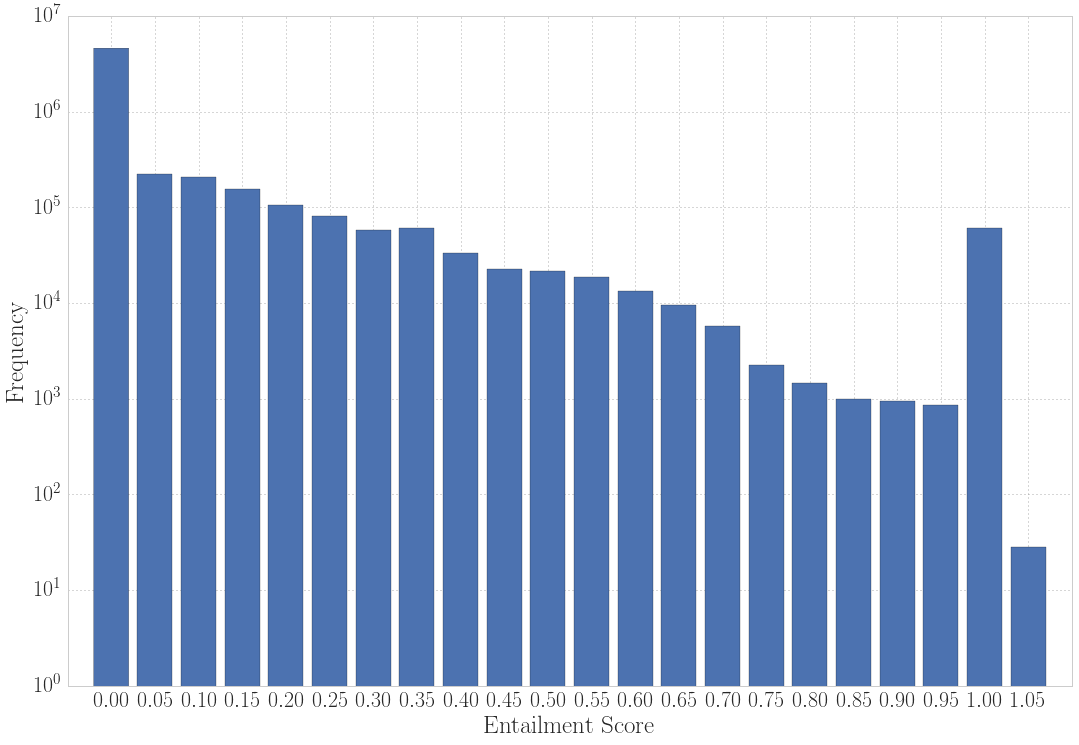

In [69]:
pgf_with_latex = {
        "axes.labelsize": 25,               # LaTeX default is 10pt font.
        "text.fontsize": 22,
        "legend.fontsize": 22,               # Make the legend/label fonts a little smaller
        "xtick.labelsize": 22,
        "ytick.labelsize": 22,
        }
mpl.rcParams.update(pgf_with_latex)
plt.rc('figure', figsize=(18,12))

rc("grid", alpha=0.9)
rc("grid", linewidth=0.7)
rc("grid", linestyle=":")
rc("grid", color='gray')

xticks = np.arange(0, 1.1, 0.05)
plt.xticks(xticks)
plt.grid(True)
plt.xlim([-0.05, 1.1])
# plt.xlim([0.05, 1.05])
# plt.ylim([0, 0.2])

# plt.hist(x, 50)
# plt.hist(x, 50, normed=1, histtype='bar', rwidth=0.7)
plt.hist(x, 40, histtype='bar', rwidth=0.8, align='left')
plt.xlabel('Entailment Score')
plt.ylabel('Frequency')
plt.yscale('log', basey=10)

# plt.tight_layout()
# plt.savefig("entailment_distribution" + ".pdf", format='pdf')
plt.show()

In [70]:
# Log Plot

# pgf_with_latex = {
#         "axes.labelsize": 25,               # LaTeX default is 10pt font.
#         "text.fontsize": 22,
#         "legend.fontsize": 22,               # Make the legend/label fonts a little smaller
#         "xtick.labelsize": 22,
#         "ytick.labelsize": 22,
#         }
# mpl.rcParams.update(pgf_with_latex)
# plt.rc('figure', figsize=(18,12))

# xticks = np.arange(0, 1.05, 0.1)
# plt.xticks(xticks)
# plt.grid(True)
# plt.xlim([-0.05, 1.05])
# # plt.xlim([0.05, 1.05])
# # plt.ylim([0, 0.2])

# # plt.hist(x, 50)
# # plt.hist(x, 50, normed=1, histtype='bar', rwidth=0.7)
# plt.hist(x, 20, histtype='bar', rwidth=0.8, align='left', log=True)
# plt.xlabel('Entailment Score')
# plt.ylabel('Frequency')
# plt.show()

In [71]:
processes = p_data.keys()

In [72]:
processes

[u'vibrates',
 u'shedding',
 u'reducing',
 u'crop rotation',
 u'recycling',
 u'dripping',
 u'hail',
 u'orbit',
 u'germinating',
 u'breathing',
 u'metamorphosis',
 u'adaptation',
 u'crossbreeding',
 u'extinction',
 u'rotation',
 u'osmosis',
 u'pollution',
 u'acceleration',
 u'the water cycle',
 u'combustion',
 u'measuring',
 u'absorption',
 u'soil formation',
 u'condense',
 u'chemical change',
 u'overpopulation',
 u'dropping',
 u'decomposition',
 u'explodes',
 u'innovation',
 u'retract',
 u'destroy',
 u'neutralization reaction',
 u'mimicry',
 u'erosion',
 u'swim',
 u'plant',
 u'hibernate',
 u'repel',
 u'sublimation',
 u'absorb',
 u'predicting',
 u'freezing',
 u'splitting',
 u'strip farming',
 u'deposition',
 u'make food',
 u'refract',
 u'meiosis',
 u'survive',
 u'water cycle',
 u'asexual reproduction',
 u'germination',
 u'precipitation',
 u'change',
 u'reflection',
 u'repairing',
 u'perspiration',
 u'evolution',
 u'condensation',
 u'respiration',
 u'physical change',
 u'move',
 u'magnet

In [73]:
x = p_data['melting'].values()

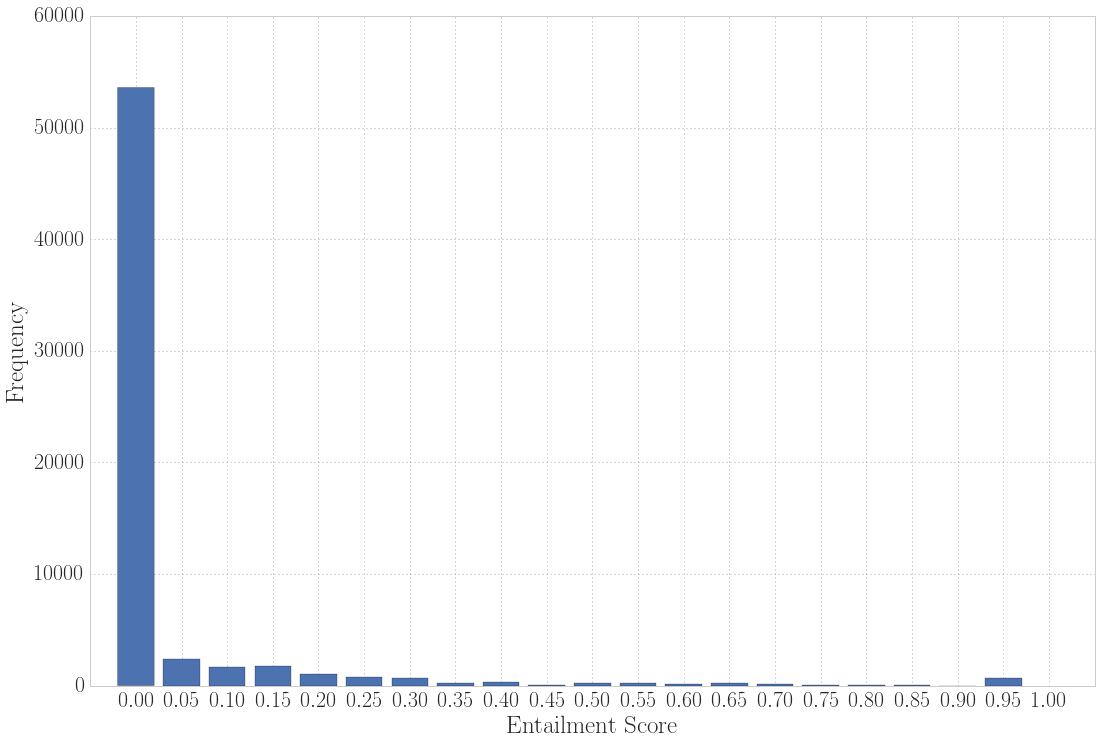

In [74]:
pgf_with_latex = {
        "axes.labelsize": 25,               # LaTeX default is 10pt font.
        "text.fontsize": 22,
        "legend.fontsize": 22,               # Make the legend/label fonts a little smaller
        "xtick.labelsize": 22,
        "ytick.labelsize": 22,
        }
mpl.rcParams.update(pgf_with_latex)
plt.rc('figure', figsize=(18,12))

rc("grid", alpha=0.9)
rc("grid", linewidth=0.7)
rc("grid", linestyle=":")
rc("grid", color='gray')

xticks = np.arange(0, 1.05, 0.05)
plt.xticks(xticks)
plt.grid(True)
plt.xlim([-0.05, 1.05])
# plt.xlim([0.05, 1.05])
# plt.ylim([0, 0.2])

# plt.hist(x, 50)
# plt.hist(x, 50, normed=1, histtype='bar', rwidth=0.7)
plt.hist(x, 20, histtype='bar', rwidth=0.8, align='left')
plt.xlabel('Entailment Score')
plt.ylabel('Frequency')

# plt.tight_layout()
# plt.savefig("entailment_distribution" + ".pdf", format='pdf')
plt.show()